In [1]:
import folium
import json

In [4]:
crime_gu = pd.read_csv('./datas/seoul_crime_result.csv', encoding='UTF-8')
geo_path = './datas/03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

crime_gu.head()

,구,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,100.000000,100.0,44.185304,86.223458
1,강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,100.000000,100.0,57.689970,86.825854
2,강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
3,강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,100.000000,100.0,58.951271,87.242798
4,관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [34]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '살인'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
legend_name='살인 발생 건수'
).add_to(my_map)

my_map

In [35]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '강간'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
legend_name='강간 발생 건수'
).add_to(my_map)

my_map

In [36]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '폭력'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
legend_name='폭력 발생 건수'
).add_to(my_map)

my_map

In [10]:
import numpy as np

In [11]:
crime_raw_data = pd.read_csv('./datas/seoul_crime/2000년.csv', 
                             usecols=[0,1,2,3], encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [14]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=[np.sum])

crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [15]:
crime_station.columns = ['강간', '1', '강도', '2', '살인', '3', '절도', '4', '폭력', '5']
crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]

crime_station.head()

,강간,강도,살인,절도,폭력
구분,,,,,
강남,70,72,4,523,4345
강동,58,40,11,671,4333
강북,48,48,8,458,3446
강서,64,55,7,509,3988
관악,44,36,7,349,2658


In [16]:
crime_station['year'] = 2000

crime_station.head()

,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


In [17]:
from glob import glob

In [32]:
glob('./datas/seoul_crime/*') # 리스트 형태로 반환

['./datas/seoul_crime\\2000년.csv',
 './datas/seoul_crime\\2001년.csv',
 './datas/seoul_crime\\2002년.csv',
 './datas/seoul_crime\\2003년.csv',
 './datas/seoul_crime\\2004년.csv',
 './datas/seoul_crime\\2005년.csv',
 './datas/seoul_crime\\2006년.csv',
 './datas/seoul_crime\\2007년.csv',
 './datas/seoul_crime\\2008년.csv',
 './datas/seoul_crime\\2009년.csv',
 './datas/seoul_crime\\2010년.csv',
 './datas/seoul_crime\\2011년.csv',
 './datas/seoul_crime\\2012년.csv',
 './datas/seoul_crime\\2013년.csv',
 './datas/seoul_crime\\2014년.csv',
 './datas/seoul_crime\\2015년.csv',
 './datas/seoul_crime\\2016년.csv',
 './datas/seoul_crime\\2017년.csv']

In [31]:
file_list = glob('./datas/seoul_crime/*.csv')
file_list

['./datas/seoul_crime\\2000년.csv',
 './datas/seoul_crime\\2001년.csv',
 './datas/seoul_crime\\2002년.csv',
 './datas/seoul_crime\\2003년.csv',
 './datas/seoul_crime\\2004년.csv',
 './datas/seoul_crime\\2005년.csv',
 './datas/seoul_crime\\2006년.csv',
 './datas/seoul_crime\\2007년.csv',
 './datas/seoul_crime\\2008년.csv',
 './datas/seoul_crime\\2009년.csv',
 './datas/seoul_crime\\2010년.csv',
 './datas/seoul_crime\\2011년.csv',
 './datas/seoul_crime\\2012년.csv',
 './datas/seoul_crime\\2013년.csv',
 './datas/seoul_crime\\2014년.csv',
 './datas/seoul_crime\\2015년.csv',
 './datas/seoul_crime\\2016년.csv',
 './datas/seoul_crime\\2017년.csv']

In [27]:
for each_file in file_list:
    print(each_file)

./datas/seoul_crime\2000년.csv
./datas/seoul_crime\2001년.csv
./datas/seoul_crime\2002년.csv
./datas/seoul_crime\2003년.csv
./datas/seoul_crime\2004년.csv
./datas/seoul_crime\2005년.csv
./datas/seoul_crime\2006년.csv
./datas/seoul_crime\2007년.csv
./datas/seoul_crime\2008년.csv
./datas/seoul_crime\2009년.csv
./datas/seoul_crime\2010년.csv
./datas/seoul_crime\2011년.csv
./datas/seoul_crime\2012년.csv
./datas/seoul_crime\2013년.csv
./datas/seoul_crime\2014년.csv
./datas/seoul_crime\2015년.csv
./datas/seoul_crime\2016년.csv
./datas/seoul_crime\2017년.csv


In [37]:
for each_file in file_list:
    print(each_file.split('\\'))

['./datas/seoul_crime', '2000년.csv']
['./datas/seoul_crime', '2001년.csv']
['./datas/seoul_crime', '2002년.csv']
['./datas/seoul_crime', '2003년.csv']
['./datas/seoul_crime', '2004년.csv']
['./datas/seoul_crime', '2005년.csv']
['./datas/seoul_crime', '2006년.csv']
['./datas/seoul_crime', '2007년.csv']
['./datas/seoul_crime', '2008년.csv']
['./datas/seoul_crime', '2009년.csv']
['./datas/seoul_crime', '2010년.csv']
['./datas/seoul_crime', '2011년.csv']
['./datas/seoul_crime', '2012년.csv']
['./datas/seoul_crime', '2013년.csv']
['./datas/seoul_crime', '2014년.csv']
['./datas/seoul_crime', '2015년.csv']
['./datas/seoul_crime', '2016년.csv']
['./datas/seoul_crime', '2017년.csv']


In [41]:
for each_file in file_list:
    print(each_file.split('\\')[-1][:4])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [49]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding='euc-kr')
    
    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index='구분', columns=['죄종', '발생검거'], aggfunc=[np.sum])
    
    crime_station.columns = crime_station.columns.droplevel([0,1,2])
    
    crime_station.columns = ['강간', '1', '강도', '2', '살인', '3', '절도', '4', '폭력', '5']
    crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]
    
    crime_station['year'] = each_file.split('\\')[-1][:4]
    
    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)
    
crime_station_t

[     구분  강간  강도  살인   절도    폭력  year
 0    강남  70  72   4  523  4345  2000
 1    강동  58  40  11  671  4333  2000
 2    강북  48  48   8  458  3446  2000
 3    강서  64  55   7  509  3988  2000
 4    관악  44  36   7  349  2658  2000
 5    광진  72  54   5  697  4379  2000
 6    구로  53  37  10  345  3056  2000
 7    금천  63  58   9  586  4376  2000
 8   남대문  23   7   3  273  1132  2000
 9    노원  32  18   3  334  2231  2000
 10   도봉  37  11   2  326  2642  2000
 11  동대문  65  59   6  529  4206  2000
 12   동작  60  28  13  474  3086  2000
 13   마포  57  35   5  416  3678  2000
 14   방배  31  19   1  226  1425  2000
 15  서대문  44  28   2  312  2300  2000
 16   서부  27  13   6  324  2715  2000
 17   서초  61  42   2  431  2538  2000
 18   성동  36  21  10  463  2871  2000
 19   성북  32  24   3  265  1800  2000
 20   송파  46  24   2  404  3224  2000
 21   수서  29  35   3  352  2983  2000
 22   양천  44  28   6  419  2611  2000
 23  영등포  44  34   7  348  2965  2000
 24   용산  39  36   4  388  2462  2000
 25   은평  24

In [43]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,강도,살인,절도,폭력,year
0,강남,70.0,72.0,4.0,523.0,4345.0,2000
1,강동,58.0,40.0,11.0,671.0,4333.0,2000
2,강북,48.0,48.0,8.0,458.0,3446.0,2000
3,강서,64.0,55.0,7.0,509.0,3988.0,2000
4,관악,44.0,36.0,7.0,349.0,2658.0,2000


In [44]:
crime_total_murder = crime_total.pivot('year', '구분', '살인')
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc('font', family='Malgun Gothic')

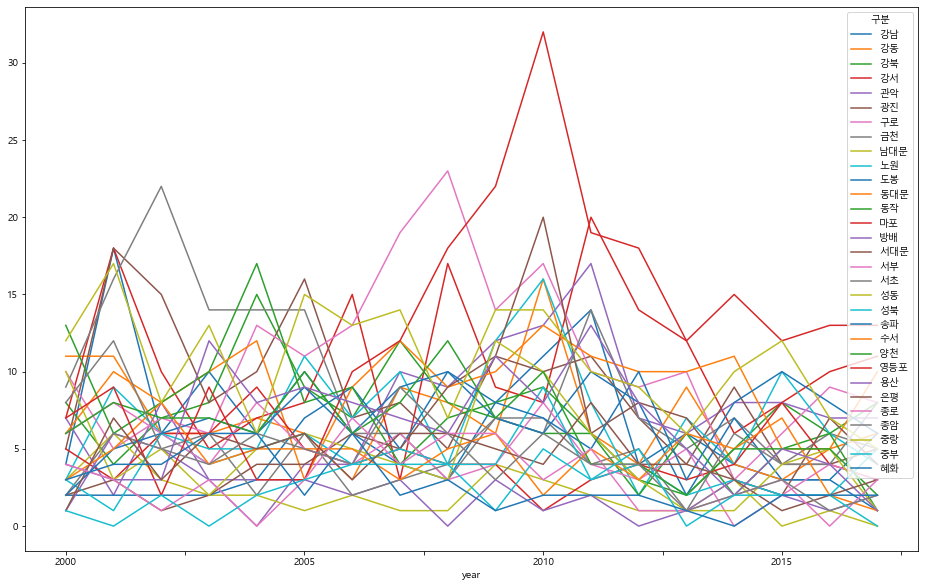

In [48]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

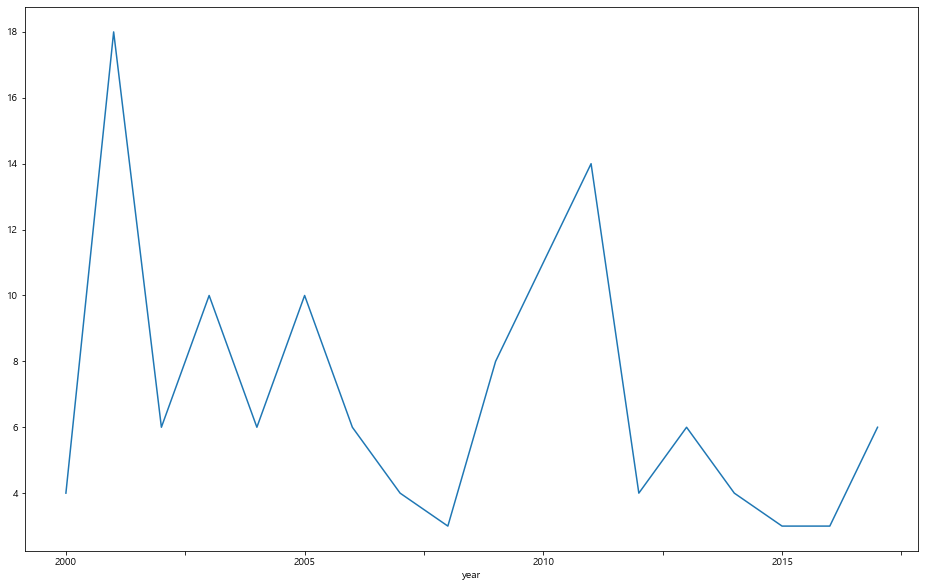

In [50]:
crime_total_murder['강남'].plot(figsize=(16,10))
plt.show()

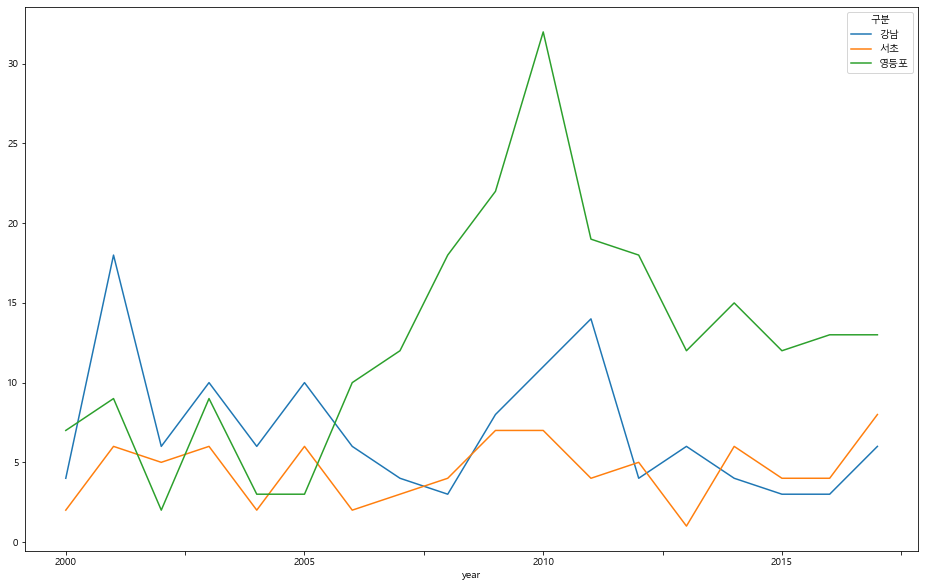

In [51]:
crime_total_murder[['강남', '서초', '영등포']].plot(figsize=(16,10))
plt.show()

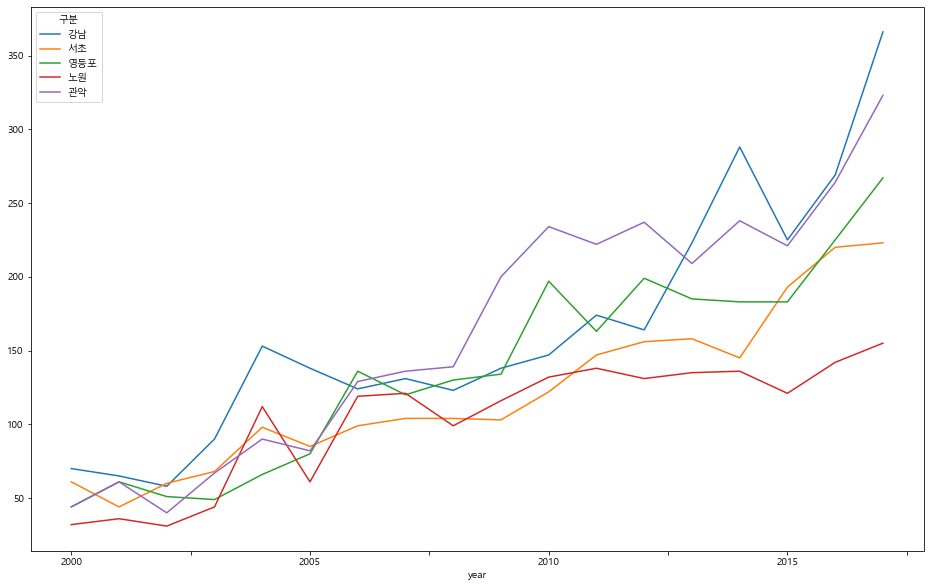

In [52]:
crime_total_sexual = crime_total.pivot('year', '구분', '강간')
crime_total_sexual[['강남', '서초', '영등포', '노원', '관악']].plot(figsize=(16,10))
plt.show()